In [44]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/finalcorpus.csv', ';', encoding= 'unicode_escape')

df['text'].head()

<ipython-input-45-e599d8470047>:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('/content/drive/My Drive/finalcorpus.csv', ';', encoding= 'unicode_escape')


0    Once she asked for daddy, but went back to sle...
1    The medication they were giving her to clear u...
2        You can sit up, but you have to stay in there
3    She met his gaze defiantly for a moment longer...
4    If it's something we simply can't afford, that...
Name: text, dtype: object

In [46]:

X = df['text']
y = df['label']

In [48]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
 X, y,
 test_size=0.2,
 random_state=42)

In [8]:


pip install tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 19.9 MB/s eta 0:00:00


In [9]:
pip install scikeras

In [49]:
import tensorflow_hub as hub
import tensorflow_text as text
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [50]:
embedding = "https://tfhub.dev/google/universal-sentence-encoder/4"
hub_layer = hub.KerasLayer(embedding, input_shape=[],
                           dtype=tf.string, trainable=True)

In [51]:


model = tf.keras.Sequential()
model.add(hub_layer)
model.add(Dense(20,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 512)               256797824 
                                                                 
 dense_12 (Dense)            (None, 20)                10260     
                                                                 
 dense_13 (Dense)            (None, 6)                 126       
                                                                 
 dense_14 (Dense)            (None, 4)                 28        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 256808243 (979.65 MB)
Trainable params: 256808243 (979.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [52]:
model.compile(optimizer='adam',loss='binary_crossentropy' ,metrics=['accuracy'])

In [53]:
history = model.fit(xtrain, ytrain,  shuffle= True, epochs=10 ,batch_size= 64, validation_data=(xtest, ytest))


Epoch 1/10
25/25 [==============================] - 99s 3s/step - loss: 0.6554 - accuracy: 0.6919 - val_loss: 0.6043 - val_accuracy: 0.7925
Epoch 2/10
25/25 [==============================] - 26s 1s/step - loss: 0.5112 - accuracy: 0.8669 - val_loss: 0.4567 - val_accuracy: 0.8500
Epoch 3/10
25/25 [==============================] - 14s 558ms/step - loss: 0.2693 - accuracy: 0.9525 - val_loss: 0.3195 - val_accuracy: 0.8825
Epoch 4/10
25/25 [==============================] - 12s 472ms/step - loss: 0.0976 - accuracy: 0.9894 - val_loss: 0.2822 - val_accuracy: 0.8800
Epoch 5/10
25/25 [==============================] - 8s 322ms/step - loss: 0.0306 - accuracy: 0.9981 - val_loss: 0.3047 - val_accuracy: 0.8825
Epoch 6/10
25/25 [==============================] - 6s 235ms/step - loss: 0.0138 - accuracy: 0.9994 - val_loss: 0.3131 - val_accuracy: 0.8825
Epoch 7/10
25/25 [==============================] - 5s 184ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.3518 - val_accuracy: 0.8800
Epoch 8/

In [54]:
model.evaluate(xtest, ytest)

13/13 [==============================] - 0s 9ms/step - loss: 0.3567 - accuracy: 0.8800


[0.3567414879798889, 0.8799999952316284]

In [55]:
model.evaluate(xtrain, ytrain)

50/50 [==============================] - 1s 10ms/step - loss: 0.0023 - accuracy: 1.0000


[0.0022792413365095854, 1.0]

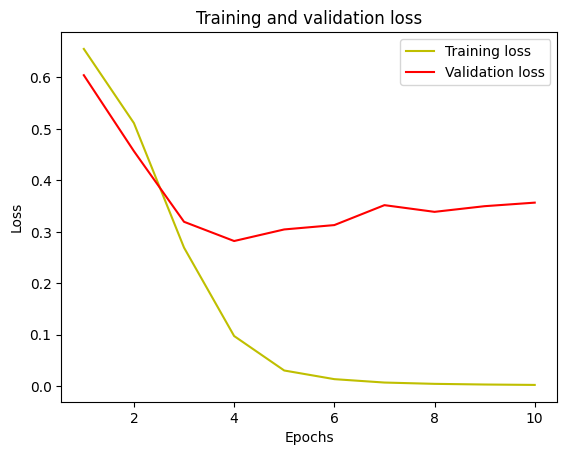

In [56]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

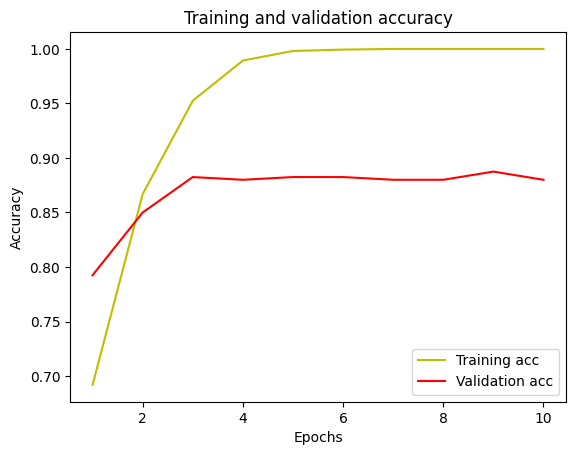

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()